In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data = data.rename({'DiabetesPedigreeFunction':'Pedigree'}, axis=1)
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


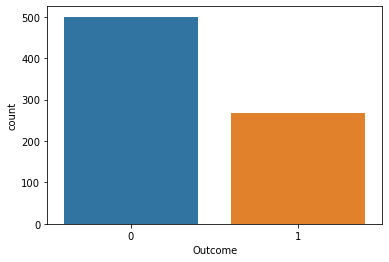

In [6]:
sns.countplot(data.Outcome)
plt.show()

In [7]:
x= data[['Pregnancies','Glucose',  'BloodPressure' ,'SkinThickness' ,'Insulin' ,'BMI','Pedigree' ,'Age']]
y= data[['Outcome']]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.25, random_state = 0)

In [ ]:
print(x_test)

In [10]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
762            9       89             62              0        0  22.5   
127            1      118             58             36       94  33.3   
564            0       91             80              0        0  32.4   
375           12      140             82             43      325  39.2   
663            9      145             80             46      130  37.9   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     Pedigree  Age  
762     0.142   33  
127     0.261   23  
564     0.601   27  
375     0.528   58  
663   

# -----------------------------------------------------------------------

# Scalling Our Dataset

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train.values.ravel())



LogisticRegression()

In [13]:
# Prediction
y_pred = classifier.predict(x_test)

# Checking the Accuacy of our Model

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[118,  12],
       [ 26,  36]], dtype=int64)

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.86131387, 0.65454545])

In [16]:
from sklearn.metrics import accuracy_score,precision_score
a=accuracy_score(y_test, y_pred)
p=precision_score(y_test, y_pred)
print("Accuracy score = ", a)
print("Precision score =", p)

Accuracy score =  0.8020833333333334
Precision score = 0.75


# --------------------------------------------------------------------

# naive_bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train.values.ravel())

GaussianNB()

# prediction

In [18]:
y_predG = classifier.predict(x_test)

# Checking accuracy

In [19]:
confusion_matrix(y_test,y_pred)

array([[118,  12],
       [ 26,  36]], dtype=int64)

In [20]:
print("your precision score =" , precision_score(y_test,y_predG))

your precision score = 0.673469387755102


In [21]:
print("your accuracy score = ", accuracy_score(y_test,y_predG))

your accuracy score =  0.765625


# ------------------------------------------------------------------------------------

# k_nearest_neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train.values.ravel())

KNeighborsClassifier()

# prediction

In [23]:
y_predK=classifier.predict(x_test)


# checking accuracy

In [24]:
print("Your accuracy score =",accuracy_score(y_test, y_predK))

Your accuracy score = 0.8020833333333334


In [25]:
print("Your precision score =",precision_score(y_test, y_predK))

Your precision score = 0.7142857142857143


In [26]:
confusion_matrix(y_test,y_predK)

array([[114,  16],
       [ 22,  40]], dtype=int64)

# -----------------------------------------------------------------------------------------

# decision_tree_classification

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting a new result

In [28]:
y_predD=classifier.predict(x_test)


# checking accuracy

In [29]:
confusion_matrix(y_test,y_predD)

array([[105,  25],
       [ 18,  44]], dtype=int64)

In [30]:
print("Your precision score =",precision_score(y_test, y_predD))

Your precision score = 0.6376811594202898


In [31]:
print("Your accuracy score =",accuracy_score(y_test, y_predD))

Your accuracy score = 0.7760416666666666


# ---------------------------------------------------------------------------

In [33]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data viz. and EDA
import matplotlib.pyplot as plt 
%matplotlib inline  
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

## For scaling data 
from mlxtend.preprocessing import minmax_scaling 

# Tensorflow 
import tensorflow as tf


In [34]:
target_count()
target_per()

NameError: name 'target_count' is not defined